### О ЛР:

- Coding Gradient boosting

----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку (Она тут равняется 6).

**Оценка**:

***DeadLine - 28.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style="darkgrid")
filterwarnings("ignore")

In [2]:
x = load_npz("x.npz")
y = np.load("y.npy")

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 666 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=666
)

x_test, x_valid, y_test, y_valid = train_test_split(
    x_test, y_test, test_size=0.5, random_state=666
)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга [2 балла]

Необходимо дописать код в файле `boosting.py`. Уже создан шаблон класса `Boosting`, который можно модифицировать по своему усмотрению.

### Описание функций:

#### `__init__`

Конструктор класса принимает следующие параметры:

- `base_model_class` — класс базовой модели для бустинга.
- `base_model_params` — словарь гиперпараметров для базовой модели.
- `n_estimators` — количество базовых моделей для обучения.
- `learning_rate` — темп обучения, должен быть в диапазоне (0, 1].
- `subsample` — доля обучающей выборки для тренировки базовой модели (размер бутстрап-выборки относительно исходной).
- `early_stopping_rounds` — число итераций без улучшения на валидационной выборке, после которых обучение прекращается.
- `plot` — флаг для построения графика качества моделей после обучения.

#### `fit`

Метод `fit` принимает обучающую и валидационную выборки.

1. Инициализируем нулевую модель и делаем предсказания (например, все нули) для обеих выборок.
2. Обучаем `n_estimators` базовых моделей:
   - Обучаем новую базовую модель на текущих остатках.
   - Обновляем предсказания на обучающей и валидационной выборках.
   - Рассчитываем ошибки на обеих выборках с помощью `loss_fn`.
   - Проверяем условия для ранней остановки.

3. Если флаг `plot` установлен, строим график качества после обучения всех моделей.

#### `fit_new_base_model`

Метод `fit_new_base_model` принимает обучающую выборку и текущие предсказания для неё.

1. Генерируем бутстрап-выборку.
2. Обучаем базовую модель на этой выборке.
3. Оптимизируем значение гаммы.
4. Добавляем новую базовую модель и гамму в соответствующие списки (учитывая `learning_rate`).

#### `predict_proba`

Метод `predict_proba` принимает выборку для предсказания вероятностей.

1. Суммируем предсказания базовых моделей (учитывая гамму и `learning_rate`).
2. Применяем сигмоидальную функцию для получения вероятностей.

In [8]:
%load_ext autoreload
%autoreload 2

from boosting import Boosting

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Проверка кода

У автора задания всё учится около одной секунды.

In [10]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 776 ms, sys: 0 ns, total: 776 ms
Wall time: 782 ms
Train ROC-AUC 0.9873
Valid ROC-AUC 0.9469
Test ROC-AUC 0.9419


## Задание 2. Обучение градиентного бустинга [0.5 балла]

Оцените качество вашей реализации градиентного бустинга на тестовой выборке, используя базовые модели — решающие деревья с различной максимальной глубиной. Метрикой будет ROC-AUC.

**Инструкция:**
1. Перебирайте значения максимальной глубины деревьев от 1 до 30 с шагом 2.
2. Оставьте остальные параметры бустинга по умолчанию.
3. Постройте график зависимости качества на обучающей и тестовой выборке от максимальной глубины деревьев.

Max Depth: 1, Train ROC-AUC: 0.9192, Test ROC-AUC: 0.9177
Max Depth: 3, Train ROC-AUC: 0.9485, Test ROC-AUC: 0.9446
Max Depth: 5, Train ROC-AUC: 0.9621, Test ROC-AUC: 0.9558
Max Depth: 7, Train ROC-AUC: 0.9717, Test ROC-AUC: 0.9608
Max Depth: 9, Train ROC-AUC: 0.9799, Test ROC-AUC: 0.9603
Max Depth: 11, Train ROC-AUC: 0.9851, Test ROC-AUC: 0.9575
Max Depth: 13, Train ROC-AUC: 0.9896, Test ROC-AUC: 0.9595
Max Depth: 15, Train ROC-AUC: 0.9925, Test ROC-AUC: 0.9561
Max Depth: 17, Train ROC-AUC: 0.9951, Test ROC-AUC: 0.9525
Max Depth: 19, Train ROC-AUC: 0.9961, Test ROC-AUC: 0.9523
Max Depth: 21, Train ROC-AUC: 0.9967, Test ROC-AUC: 0.9511
Max Depth: 23, Train ROC-AUC: 0.9973, Test ROC-AUC: 0.9475
Max Depth: 25, Train ROC-AUC: 0.9976, Test ROC-AUC: 0.9539
Max Depth: 27, Train ROC-AUC: 0.9980, Test ROC-AUC: 0.9479
Max Depth: 29, Train ROC-AUC: 0.9980, Test ROC-AUC: 0.9503


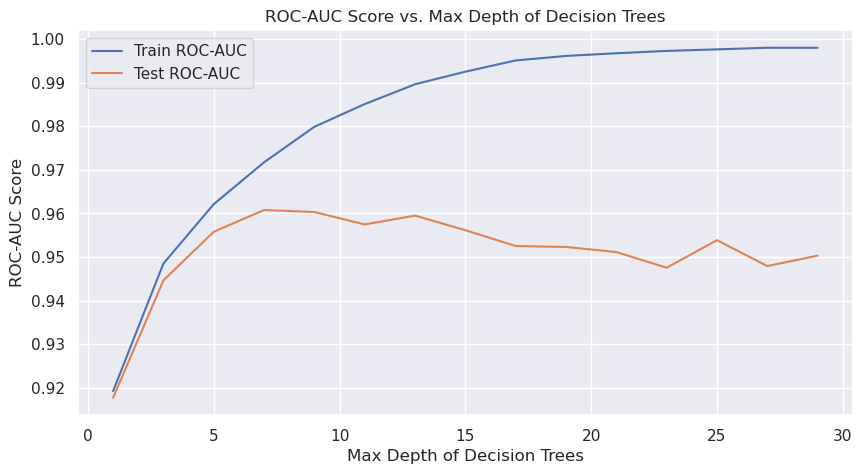

In [18]:
results = {
    'train': [],
    'test':  [],
    'depth': []
}

depths = range(1, 30, 2)

for d in depths:
    boosting  = Boosting(
        base_model_params={'max_depth':  d},
        n_estimators=30,
        learning_rate=0.3,
        subsample = 0.4,
        early_stopping_rounds = 10,
        plot = False
    )
    
    boosting.fit(x_train, y_train, x_valid, y_valid)
    
    auc_tr = boosting.score(x_train, y_train)
    # auc_val  = boosting.score(x_valid, y_valid)
    auc_tst  = boosting.score(x_test, y_test)
    
    results['train'].append(auc_tr)
    results['test'].append(auc_tst)
    results['depth'].append(d)
    
    print(f"Max Depth: {d}, Train ROC-AUC: {auc_tr:.4f}, Test ROC-AUC: {auc_tst:.4f}")
    
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(results['depth'], results['train'], label='Train ROC-AUC')
plt.plot(results['depth'], results['test'], label='Test ROC-AUC')
plt.xlabel('Max Depth of Decision Trees')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Score vs. Max Depth of Decision Trees')
plt.legend()
plt.grid(True)
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

На тестовой выборке лучше всего себя показала модель с глубиной 7 - ROC-AUC = 0.9608

При большой глубине алгоритм рискует сильно переобучиться уже на 1м (в нашем случае) дереве регрессоре. Все последующие деревья априори будут иметь смещение по bias с низким variance. Т.о. ансамбль начинает системно промахиваться, ему не хватает обобщающей способности. 

При небольшой глубине алгоритм потенциально может иметь слишком большой bias на первых деревьях, соответственно при дальшейшей оптимизации ошибки на подвыборках есть риск промахнуться в bias генеральной совокупности и оптимизироваться немного не туда. И тем не менее данный вариант более предпочтителен, так как даже на графике выше видно, что при такой ситуации модель не переобучена (качество на тесте аналогично трэйну)

В нашем случае баланс сил достигается при глубине 7.

## Задание 3. Подбор гиперпараметров и поиск оптимальной модели [3 балла]

Настройте основные гиперпараметры вашей модели градиентного бустинга, используя валидационную выборку. Подберите параметры как для самого бустинга, так и для базовых моделей.

**Рекомендации:**
- Используйте библиотеки для автоматизированного подбора гиперпараметров, такие как [Hyperopt](https://github.com/hyperopt/hyperopt) или [Optuna](https://optuna.org/).
- Подберите все основные параметры, чтобы найти лучшую модель на валидационной выборке.

In [25]:
import optuna

def objective(trial):
    # Define the hyperparameters to be tuned
    base_model_params = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
    }
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)

    # Initialize the Boosting model
    boosting_model = Boosting(
        base_model_class=DecisionTreeRegressor,
        base_model_params=base_model_params,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        early_stopping_rounds=10
    )
    
    # Fit the model
    boosting_model.fit(x_train, y_train, x_valid, y_valid)
    valid_auc = boosting.score(x_valid, y_valid)
    return valid_auc

# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print('Best hyperparameters: ', study.best_params)
print('Best validation ROC-AUC: ', study.best_value)

# Use the best hyperparameters to train a final model
best_params = study.best_params
best_base_model_params = {
    'max_depth': best_params['max_depth'],
    'min_samples_leaf': best_params['min_samples_leaf']
}
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']

final_boosting_model = Boosting(
    base_model_class=DecisionTreeRegressor,
    base_model_params=best_base_model_params,
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate
)

final_boosting_model.fit(x_train, y_train, x_valid, y_valid)

print(f"Final Model Train ROC-AUC: {final_boosting_model.score(x_train, y_train):.4f}")
print(f"Final Model Validation ROC-AUC: {final_boosting_model.score(x_valid, y_valid):.4f}")
print(f"Final Model Test ROC-AUC: {final_boosting_model.score(x_test, y_test):.4f}")

[I 2024-06-13 01:42:08,966] A new study created in memory with name: no-name-b5ce107f-5860-4ebb-85a0-5b6b9c6c32c7
[I 2024-06-13 01:42:10,989] Trial 0 finished with value: 0.9507833560199642 and parameters: {'max_depth': 1, 'min_samples_leaf': 9, 'n_estimators': 87, 'learning_rate': 0.16079703887233007}. Best is trial 0 with value: 0.9507833560199642.
[I 2024-06-13 01:42:12,019] Trial 1 finished with value: 0.9507833560199642 and parameters: {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 44, 'learning_rate': 0.24938980419994516}. Best is trial 0 with value: 0.9507833560199642.
[I 2024-06-13 01:42:14,924] Trial 2 finished with value: 0.9507833560199642 and parameters: {'max_depth': 10, 'min_samples_leaf': 6, 'n_estimators': 73, 'learning_rate': 0.03147123563087297}. Best is trial 0 with value: 0.9507833560199642.
[I 2024-06-13 01:42:17,114] Trial 3 finished with value: 0.9507833560199642 and parameters: {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 54, 'learning_rate'

Best hyperparameters:  {'max_depth': 1, 'min_samples_leaf': 9, 'n_estimators': 87, 'learning_rate': 0.16079703887233007}
Best validation ROC-AUC:  0.9507833560199642
Final Model Train ROC-AUC: 0.9272
Final Model Validation ROC-AUC: 0.9259
Final Model Test ROC-AUC: 0.9257


## Задание 4. Интерпретация градиентного бустинга [1 балл]

Постройте калибровочную кривую для вашей лучшей модели градиентного бустинга и оцените, насколько точно модель предсказывает вероятности.

**Инструкция:**
1. Постройте калибровочную кривую для лучшей модели градиентного бустинга.
2. Постройте аналогичную кривую для логистической регрессии.
3. Сравните полученные результаты и проанализируйте, насколько хорошо каждая модель оценивает вероятности.

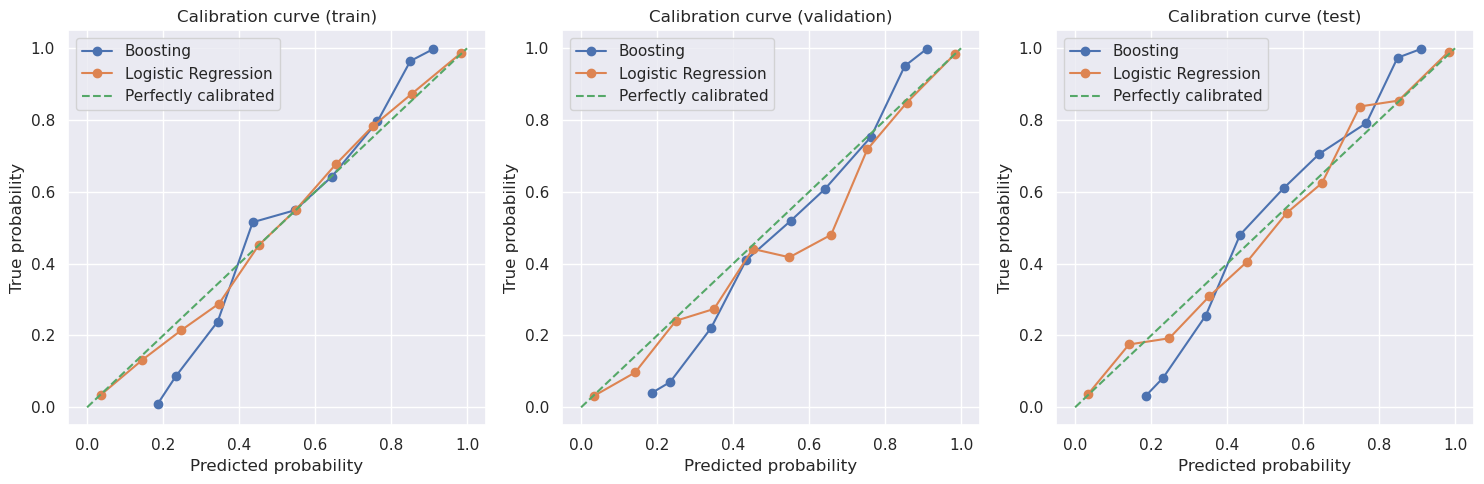

In [28]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

# Generate calibration curves
boost_proba_train = final_boosting_model.predict_proba(x_train)[:, 1]
boost_proba_valid = final_boosting_model.predict_proba(x_valid)[:, 1]
boost_proba_test = final_boosting_model.predict_proba(x_test)[:, 1]

boosting_train_prob_true, boosting_train_prob_pred = calibration_curve(y_train, boost_proba_train, n_bins=10)
boosting_valid_prob_true, boosting_valid_prob_pred = calibration_curve(y_valid, boost_proba_valid, n_bins=10)
boosting_test_prob_true, boosting_test_prob_pred = calibration_curve(y_test, boost_proba_test, n_bins=10)

# train logreg 
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
logreg_train_proba = logreg.predict_proba(x_train)[:, 1]
logreg_valid_proba = logreg.predict_proba(x_valid)[:, 1]
logreg_test_proba = logreg.predict_proba(x_test)[:, 1]

logreg_train_prob_true, logreg_train_prob_pred = calibration_curve(y_train, logreg_train_proba, n_bins=10)
logreg_valid_prob_true, logreg_valid_prob_pred = calibration_curve(y_valid, logreg_valid_proba, n_bins=10)
logreg_test_prob_true, logreg_test_prob_pred = calibration_curve(y_test, logreg_test_proba, n_bins=10)

# Plot calibration curves
plt.figure(figsize=(15, 5))

# Calibration plot for the training set
plt.subplot(1, 3, 1)
plt.plot(boosting_train_prob_pred, boosting_train_prob_true, marker='o', label='Boosting')
plt.plot(logreg_train_prob_pred, logreg_train_prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration curve (train)')
plt.legend()
plt.grid(True)

# Calibration plot for the validation set
plt.subplot(1, 3, 2)
plt.plot(boosting_valid_prob_pred, boosting_valid_prob_true, marker='o', label='Boosting')
plt.plot(logreg_valid_prob_pred, logreg_valid_prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration curve (validation)')
plt.legend()
plt.grid(True)

# Calibration plot for the test set
plt.subplot(1, 3, 3)
plt.plot(boosting_test_prob_pred, boosting_test_prob_true, marker='o', label='Boosting')
plt.plot(logreg_test_prob_pred, logreg_test_prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration curve (test)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Логистическая регрессия, как правило, дает более точные оценки вероятности по сравнению с моделью градиентного усиления, особенно в среднем диапазоне прогнозируемых вероятностей.

GB показывает большую изменчивость и некоторые просчеты в калибровке, проявляя тенденцию к чрезмерной уверенности при более высоких вероятностях и неуверенности в себе при более низких вероятностях.

Теперь оценим важность признаков для градиентного бустинга.

**Задание:**
1. Поскольку базовая модель — дерево из `sklearn`, вычислите важность каждого признака для каждого дерева, используя атрибут `feature_importances_` у `DecisionTreeRegressor`.
2. Усредните значения важности по всем деревьям и нормализуйте их так, чтобы сумма была равна единице (убедитесь, что значения неотрицательны).
3. Дополните вашу реализацию бустинга, добавив метод `feature_importances_`, который будет возвращать усредненные и нормализованные важности признаков.

**Построение графиков:**
1. Постройте столбчатую диаграмму важности признаков для градиентного бустинга.
2. На соседнем графике изобразите важность признаков для логистической регрессии, используя модули весов.
3. Сравните графики и проанализируйте полученные результаты.

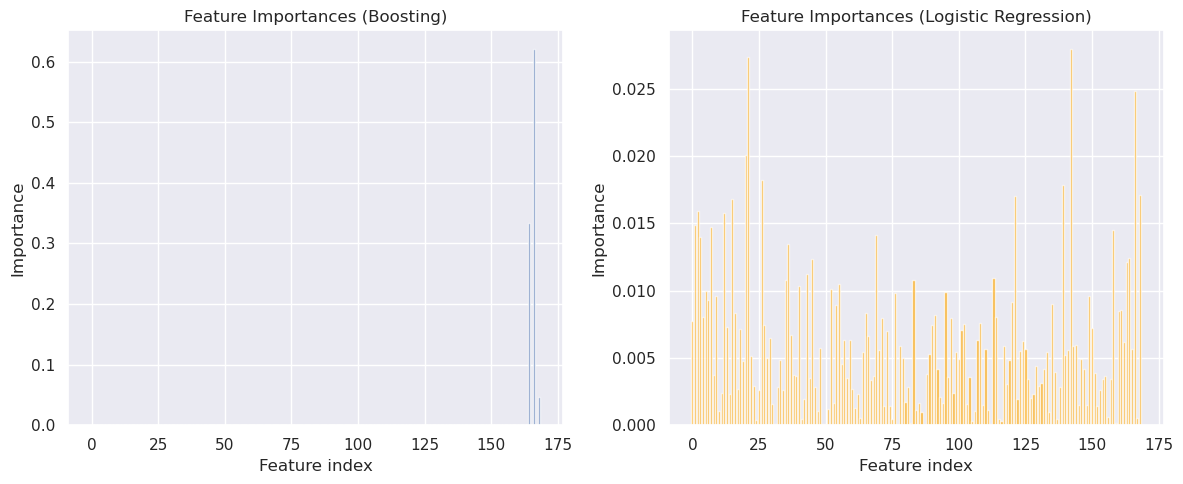

In [35]:
boosting_feature_importances = final_boosting_model.feature_importances_
logreg_feature_importances = np.abs(logreg.coef_[0])

boosting_feature_importances /= np.sum(boosting_feature_importances)
logreg_feature_importances /= np.sum(logreg_feature_importances)

features = range(len(boosting_feature_importances))

# Plot the feature importances
features = np.arange(x_train.shape[1])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(features, boosting_feature_importances, color='b', alpha=0.7)
plt.title('Feature Importances (Boosting)')
plt.xlabel('Feature index')
plt.ylabel('Importance')

plt.subplot(1, 2, 2)
plt.bar(features, logreg_feature_importances, color='orange', alpha=0.7)
plt.title('Feature Importances (Logistic Regression)')
plt.xlabel('Feature index')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()

Gradient Boosting:
    - Доминирующие признаки. Несколько признаков имеею значительную важность, подавляющее большинство не имеют важности вообще. 
    
Логистическая регрессия:
    - Значения индивидуальной важности относительно низки по сравнению с GB, что позволяет предположить, что логистическая регрессия присваивает меньший вес каждому признаку, но в целом учитывает большее количество признаков.

Обычно избыточные признаки могут негативно влиять на качество бустинга. Попробуйте следующее:

1. **Отфильтруйте неважные признаки:** Используйте построенную диаграмму важности признаков, чтобы отобрать наиболее незначительные признаки.
2. **Обучите модель повторно:** Обучите модель на основе оставшихся признаков с теми же гиперпараметрами.
3. **Оцените качество модели:** Сравните результаты новой модели с исходной. Улучшилось ли качество после отфильтровывания незначительных признаков?

In [40]:
# Determine threshold to filter out unimportant features
importance_threshold = 0  # Keep important features with positive importance
important_features = np.where(boosting_feature_importances > importance_threshold)[0]

# Filter out unimportant features from the dataset
x_train_reduced = x_train[:, important_features]
x_valid_reduced = x_valid[:, important_features]
x_test_reduced = x_test[:, important_features]

reduced_boosting_model = Boosting(
    base_model_class=DecisionTreeRegressor,
    base_model_params=best_base_model_params,
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate
)

reduced_boosting_model.fit(x_train_reduced, y_train, x_valid_reduced, y_valid)

print('Model on full feature set')
print(f"Final Model Train ROC-AUC: {final_boosting_model.score(x_train, y_train):.4f}")
print(f"Final Model Validation ROC-AUC: {final_boosting_model.score(x_valid, y_valid):.4f}")
print(f"Final Model Test ROC-AUC: {final_boosting_model.score(x_test, y_test):.4f}")
print(30*'==')
print('Model on reduced feature set')
print(f"Final Model Train ROC-AUC: {reduced_boosting_model.score(x_train_reduced, y_train):.4f}")
print(f"Final Model Validation ROC-AUC: {reduced_boosting_model.score(x_valid_reduced, y_valid):.4f}")
print(f"Final Model Test ROC-AUC: {reduced_boosting_model.score(x_test_reduced, y_test):.4f}")
print(30*'==')
print('Delta scores per sample')
print(f"Delta Train ROC-AUC: {(final_boosting_model.score(x_train, y_train) - reduced_boosting_model.score(x_train_reduced, y_train)):.4f}")
print(f"Delta Validation ROC-AUC: {(final_boosting_model.score(x_valid, y_valid) - reduced_boosting_model.score(x_valid_reduced, y_valid)):.4f}")
print(f"Delta Test ROC-AUC: {(final_boosting_model.score(x_test, y_test) - reduced_boosting_model.score(x_test_reduced, y_test)):.4f}")

Model on full feature set
Final Model Train ROC-AUC: 0.9272
Final Model Validation ROC-AUC: 0.9259
Final Model Test ROC-AUC: 0.9257
Model on reduced feature set
Final Model Train ROC-AUC: 0.9274
Final Model Validation ROC-AUC: 0.9264
Final Model Test ROC-AUC: 0.9256
Delta scores per sample
Delta Train ROC-AUC: -0.0001
Delta Validation ROC-AUC: -0.0005
Delta Test ROC-AUC: 0.0002


In [47]:
print(f"Кол-во признаков сократилось в {len(final_boosting_model.feature_importances_) // len(reduced_boosting_model.feature_importances_)} раз")

Кол-во признаков сократилось в 56 раз


__Вывод:__

С предложенным treshold отбора признаков по вожности (>0) качество модели существенно не изменилось, а количество признаков умменьшилось в 56 раз

## Задание 5 (бонус). Блендинговое [0.5 балла]

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 6 (бонус). Катбустовое [0.5 балла]

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Оставьте пожалуйста отзыв о курсе!

https://forms.gle/LajA3Xrps6u96Q5A8


Это очень важно. Благодаря обратной связи мы будем двигаться в сторону антиградиента)
